<a href="https://colab.research.google.com/github/pat-ch0/DataScience-intro/blob/main/Analyse_Open_Food_Facts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyse d'échantillon Open Food Facts

## Data loading

### Charger le fichier "colab_food.ods" dans un DataFrame Pandas.

## Data exploration

### Explorer le jeu de données chargé pour comprendre ses caractéristiques de base.


In [ ]:
# Examiner la forme du DataFrame
print("Forme du DataFrame :", df.shape)

Forme du DataFrame : (999, 13)


In [ ]:
# Déterminer les types de données de chaque colonne
print("\nTypes de données de chaque colonne :\n", df.dtypes)


Types de données de chaque colonne :
 _id             object
code             int64
brands          object
product_name    object
quantity        object
categories      object
pnns_group      object
allergens       object
labels          object
countries       object
store           object
Unnamed: 11     object
Unnamed: 12     object
dtype: object


In [ ]:
# Vérifier les valeurs manquantes dans chaque colonne
print("\nValeurs manquantes dans chaque colonne :\n", df.isnull().sum())


Valeurs manquantes dans chaque colonne :
 _id               0
code              0
brands            0
product_name      0
quantity          0
categories      358
pnns_group        0
allergens       856
labels          561
countries         2
store           810
Unnamed: 11     997
Unnamed: 12     998
dtype: int64


In [ ]:
# Afficher les 10 premières lignes du DataFrame
display(df.head(10))

,_id,code,brands,product_name,quantity,categories,pnns_group,allergens,labels,countries,store,Unnamed: 11,Unnamed: 12
0,67a8ca5555ba2894f3bf10b0,114,Jeff de Bruges,Chocolate n 3,80 g,NaN,unknown,NaN,"Point Vert, Fabriqué en France",France,NaN,NaN,NaN
1,67a8ca5555ba2894f3bf10b1,1,"YAMI, Selbst gemacht",Yogurt Smoothie,300g,supplements,unknown,NaN,"No gluten, Vegetarian, No artificial flavors, ...","Allemagne, États-Unis, en:fr",NaN,NaN,NaN
2,67a8ca5555ba2894f3bf10b2,105,AdvoCare,Paleta gran reserva - Sierra nevada-,750ml,Beverages,Artificially sweetened beverages,NaN,NaN,"Spanien, Germany",NaN,NaN,NaN
3,67a8ca5555ba2894f3bf10b3,2,Chocolate,Carnation,700ml,"Beverages and beverages preparations, Beverage...",Unsweetened beverages,NaN,"Organic, EU Organic, FR-BIO-01, en:nutriscore","Vereinigte Staaten von Amerika, Germany",Amazon.ca,NaN,NaN
4,67a8ca5555ba2894f3bf10b5,4,Sun-Maid,pena nakanak,1000ml,"en:sample, Beverages",Unsweetened beverages,en:nuts,"Fair trade,Bio,EU bio,en:Certified B Corporati...",Německo,Amazon,NaN,NaN
5,67a8ca5555ba2894f3bf10b9,8,"Nutri +, Whiskey",Aberfeldy 12 years,700ml,"Nahrungsergänzungsmittel, Nahrungsergänzungen ...",Artificially sweetened beverages,NaN,"Halal, en:no-lactose","Vereinigte Staaten von Amerika, Germany",NaN,NaN,NaN
6,67a8ca5555ba2894f3bf10ba,9,"Mission, Whiskey",Plant Protein Tortilla,700ml,"en:Tortilla, Beverages",unknown,NaN,"Vegetarian, Vegan, en:de-oko-006","Spanien, Germany",NaN,NaN,NaN
7,67a8ca5555ba2894f3bf10bc,10,"Eat Well, Whiskey",Zaatar,700ml,"Imbiss, Desserts, Süßer Snack, Kekse und Kuche...",Sweetened beverages,"en:eggs,en:gluten,en:milk","Point Vert, Sans colorants, Sans huile de palme","Frankreich, Germany","M2I,Bijou",NaN,NaN
8,67a8ca5555ba2894f3bf10bd,11,"Kugler, Pyrat",Pyrat XO Reserve Rum,1pcs,NaN,unknown,NaN,NaN,en:germany,NaN,NaN,NaN
9,67a8ca5555ba2894f3bf10c0,15,Bijou,Madeleines ChocoLait,1080 g,"Snacks, Snacks sucrés, Biscuits et gâteaux, Gâ...",Biscuits and cakes,NaN,NaN,France,NaN,NaN,NaN


In [ ]:
# Calculer le nombre de valeurs uniques pour chaque colonne
print("\nNombre de valeurs uniques dans chaque colonne :\n", df.nunique())


Nombre de valeurs uniques dans chaque colonne :
 _id             999
code            999
brands          630
product_name    984
quantity        471
categories      500
pnns_group       39
allergens        52
labels          291
countries       170
store            84
Unnamed: 11       2
Unnamed: 12       1
dtype: int64


In [ ]:
# Obtenir les statistiques descriptives pour les colonnes numériques
numerical_cols = df.select_dtypes(include=['number'])
if not numerical_cols.empty:
    print(
        "\nStatistiques descriptives pour les colonnes numériques :\n", numerical_cols.describe())


Statistiques descriptives pour les colonnes numériques :
                code
count  9.990000e+02
mean   1.904283e+08
std    3.360527e+08
min    1.000000e+00
25%    1.484500e+03
50%    6.910000e+03
75%    2.000000e+08
max    1.210079e+09


In [ ]:
# Analyser les colonnes catégorielles
categorical_cols = df.select_dtypes(exclude=['number'])
for col in categorical_cols.columns:
    print(
        f"\nDénombrement des valeurs pour {col} :\n{categorical_cols[col].value_counts(dropna=False)}")


Dénombrement des valeurs pour _id :
_id
67a8ca5555ba2894f3bf10b0    1
67a8ca5655ba2894f3bf21a7    1
67a8ca5655ba2894f3bf2170    1
67a8ca5655ba2894f3bf2174    1
67a8ca5655ba2894f3bf2175    1
                           ..
67a8ca5655ba2894f3bf16ed    1
67a8ca5655ba2894f3bf16f3    1
67a8ca5655ba2894f3bf16fe    1
67a8ca5655ba2894f3bf1700    1
67a8ca5755ba2894f3bf344c    1
Name: count, Length: 999, dtype: int64

Dénombrement des valeurs pour brands :
brands
Liebig                 46
Kazidomi               41
Herbalife              40
Bama dagligvare  as    23
Bijou                  20
                       ..
Csipós                  1
DiaPro,ALECUR           1
HERBALIFE               1
DELIFIN                 1
S.M.Novella             1
Name: count, Length: 630, dtype: int64

Dénombrement des valeurs pour product_name :
product_name
Chokodomi Pâte à Tartiner Chocolat Noisettes Bio    2
velouté de 10 légumes                               2
Protein Drink Mix                                  

In [ ]:
# Examine the shape of the DataFrame
print("Shape of the DataFrame:", df.shape)

# Determine the data types of each column
print("\nData types of each column:\n", df.dtypes)

# Check for missing values in each column
print("\nMissing values in each column:\n", df.isnull().sum())

# Display the first 10 rows of the DataFrame
display(df.head(10))

# Calculate the number of unique values for each column
print("\nNumber of unique values in each column:\n", df.nunique())

# Get summary statistics for numerical columns
numerical_cols = df.select_dtypes(include=['number'])
if not numerical_cols.empty:
    print("\nSummary statistics for numerical columns:\n", numerical_cols.describe())

# Analyze categorical columns
categorical_cols = df.select_dtypes(exclude=['number'])
for col in categorical_cols.columns:
    print(f"\nValue counts for {col}:\n{categorical_cols[col].value_counts(dropna=False)}")

Shape of the DataFrame: (999, 13)

Data types of each column:
 _id             object
code             int64
brands          object
product_name    object
quantity        object
categories      object
pnns_group      object
allergens       object
labels          object
countries       object
store           object
Unnamed: 11     object
Unnamed: 12     object
dtype: object

Missing values in each column:
 _id               0
code              0
brands            0
product_name      0
quantity          0
categories      358
pnns_group        0
allergens       856
labels          561
countries         2
store           810
Unnamed: 11     997
Unnamed: 12     998
dtype: int64


,_id,code,brands,product_name,quantity,categories,pnns_group,allergens,labels,countries,store,Unnamed: 11,Unnamed: 12
0,67a8ca5555ba2894f3bf10b0,114,Jeff de Bruges,Chocolate n 3,80 g,NaN,unknown,NaN,"Point Vert, Fabriqué en France",France,NaN,NaN,NaN
1,67a8ca5555ba2894f3bf10b1,1,"YAMI, Selbst gemacht",Yogurt Smoothie,300g,supplements,unknown,NaN,"No gluten, Vegetarian, No artificial flavors, ...","Allemagne, États-Unis, en:fr",NaN,NaN,NaN
2,67a8ca5555ba2894f3bf10b2,105,AdvoCare,Paleta gran reserva - Sierra nevada-,750ml,Beverages,Artificially sweetened beverages,NaN,NaN,"Spanien, Germany",NaN,NaN,NaN
3,67a8ca5555ba2894f3bf10b3,2,Chocolate,Carnation,700ml,"Beverages and beverages preparations, Beverage...",Unsweetened beverages,NaN,"Organic, EU Organic, FR-BIO-01, en:nutriscore","Vereinigte Staaten von Amerika, Germany",Amazon.ca,NaN,NaN
4,67a8ca5555ba2894f3bf10b5,4,Sun-Maid,pena nakanak,1000ml,"en:sample, Beverages",Unsweetened beverages,en:nuts,"Fair trade,Bio,EU bio,en:Certified B Corporati...",Německo,Amazon,NaN,NaN
5,67a8ca5555ba2894f3bf10b9,8,"Nutri +, Whiskey",Aberfeldy 12 years,700ml,"Nahrungsergänzungsmittel, Nahrungsergänzungen ...",Artificially sweetened beverages,NaN,"Halal, en:no-lactose","Vereinigte Staaten von Amerika, Germany",NaN,NaN,NaN
6,67a8ca5555ba2894f3bf10ba,9,"Mission, Whiskey",Plant Protein Tortilla,700ml,"en:Tortilla, Beverages",unknown,NaN,"Vegetarian, Vegan, en:de-oko-006","Spanien, Germany",NaN,NaN,NaN
7,67a8ca5555ba2894f3bf10bc,10,"Eat Well, Whiskey",Zaatar,700ml,"Imbiss, Desserts, Süßer Snack, Kekse und Kuche...",Sweetened beverages,"en:eggs,en:gluten,en:milk","Point Vert, Sans colorants, Sans huile de palme","Frankreich, Germany","M2I,Bijou",NaN,NaN
8,67a8ca5555ba2894f3bf10bd,11,"Kugler, Pyrat",Pyrat XO Reserve Rum,1pcs,NaN,unknown,NaN,NaN,en:germany,NaN,NaN,NaN
9,67a8ca5555ba2894f3bf10c0,15,Bijou,Madeleines ChocoLait,1080 g,"Snacks, Snacks sucrés, Biscuits et gâteaux, Gâ...",Biscuits and cakes,NaN,NaN,France,NaN,NaN,NaN



Number of unique values in each column:
 _id             999
code            999
brands          630
product_name    984
quantity        471
categories      500
pnns_group       39
allergens        52
labels          291
countries       170
store            84
Unnamed: 11       2
Unnamed: 12       1
dtype: int64

Summary statistics for numerical columns:
                code
count  9.990000e+02
mean   1.904283e+08
std    3.360527e+08
min    1.000000e+00
25%    1.484500e+03
50%    6.910000e+03
75%    2.000000e+08
max    1.210079e+09

Value counts for _id:
_id
67a8ca5555ba2894f3bf10b0    1
67a8ca5655ba2894f3bf21a7    1
67a8ca5655ba2894f3bf2170    1
67a8ca5655ba2894f3bf2174    1
67a8ca5655ba2894f3bf2175    1
                           ..
67a8ca5655ba2894f3bf16ed    1
67a8ca5655ba2894f3bf16f3    1
67a8ca5655ba2894f3bf16fe    1
67a8ca5655ba2894f3bf1700    1
67a8ca5755ba2894f3bf344c    1
Name: count, Length: 999, dtype: int64

Value counts for brands:
brands
Liebig                 46
Kazido

## Data analysis

### Effectuer une analyse détaillée des données sur le jeu de données nettoyé.

In [ ]:
# Statistiques descriptives pour les colonnes numériques
numerical_cols = df.select_dtypes(include=['number'])
print(
    "Statistiques descriptives pour les colonnes numériques :\n", numerical_cols.describe())

Statistiques descriptives pour les colonnes numériques :
                code
count  9.990000e+02
mean   1.904283e+08
std    3.360527e+08
min    1.000000e+00
25%    1.484500e+03
50%    6.910000e+03
75%    2.000000e+08
max    1.210079e+09


In [ ]:
# Analyse des colonnes catégorielles
categorical_cols = ['brands', 'product_name', 'quantity', 'categories', 'pnns_group', 'allergens', 'labels', 'countries', 'store']
for col in categorical_cols:
    if col in df.columns:
        print(f"\nDénombrement des valeurs pour {col} :\n{df[col].value_counts(dropna=False)}")
        print(f"\nValeur la plus fréquente pour {col} : {df[col].mode()[0]}")
        print(f"Valeur la moins fréquente pour {col} : {df[col].value_counts(dropna=False).index[-1]}")


Dénombrement des valeurs pour brands :
brands
Liebig                 46
Kazidomi               41
Herbalife              40
Bama dagligvare  as    23
Bijou                  20
                       ..
Csipós                  1
DiaPro,ALECUR           1
HERBALIFE               1
DELIFIN                 1
S.M.Novella             1
Name: count, Length: 630, dtype: int64

Valeur la plus fréquente pour brands : Liebig
Valeur la moins fréquente pour brands : S.M.Novella

Dénombrement des valeurs pour product_name :
product_name
Chokodomi Pâte à Tartiner Chocolat Noisettes Bio    2
velouté de 10 légumes                               2
Protein Drink Mix                                   2
Délice de 8 légumes                                 2
Whey Protein Isolate                                2
                                                   ..
Aa Unbranded Urad Dal Split-1Kg                     1
Aa Unbranded Urad Dal Gota                          1
Sablés Coco Lait                      

In [ ]:
# Relation entre 'code' et les colonnes catégorielles
for col in categorical_cols:
    if col in df.columns:
        print(f"\n'Code' moyen pour chaque valeur unique dans '{col}' :")
        print(df.groupby(col)['code'].mean())


'Code' moyen pour chaque valeur unique dans 'brands' :
brands
2054                7.959000e+03
615184812           6.151848e+08
0lmou               8.028116e+08
4life               1.032261e+08
7 days Mondeleez    3.647817e+08
                        ...     
السعر 10 ريال       3.043155e+08
السعر 13 ريال       5.505506e+08
الشوكه الذهبيه      1.234579e+08
نبيل                3.483000e+03
良品铺子                1.007408e+09
Name: code, Length: 630, dtype: float64

'Code' moyen pour chaque valeur unique dans 'product_name' :
product_name
76750267156369298348797067264              1.005611e+08
10 chicken stock cubes                     3.100000e+01
100% Pure Orange Juice from Concentrate    7.098000e+03
100% Soja Protein Haselnuss                4.609387e+08
100% Whole Wheat Hot Dog Buns              4.900000e+03
                                               ...     
رطب القصيم                                 5.505506e+08
كميره البيت                                8.028116e+08
مخلل خيار (

## Data visualization

### Visualiser les distributions des caractéristiques numériques et catégorielles dans le jeu de données.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

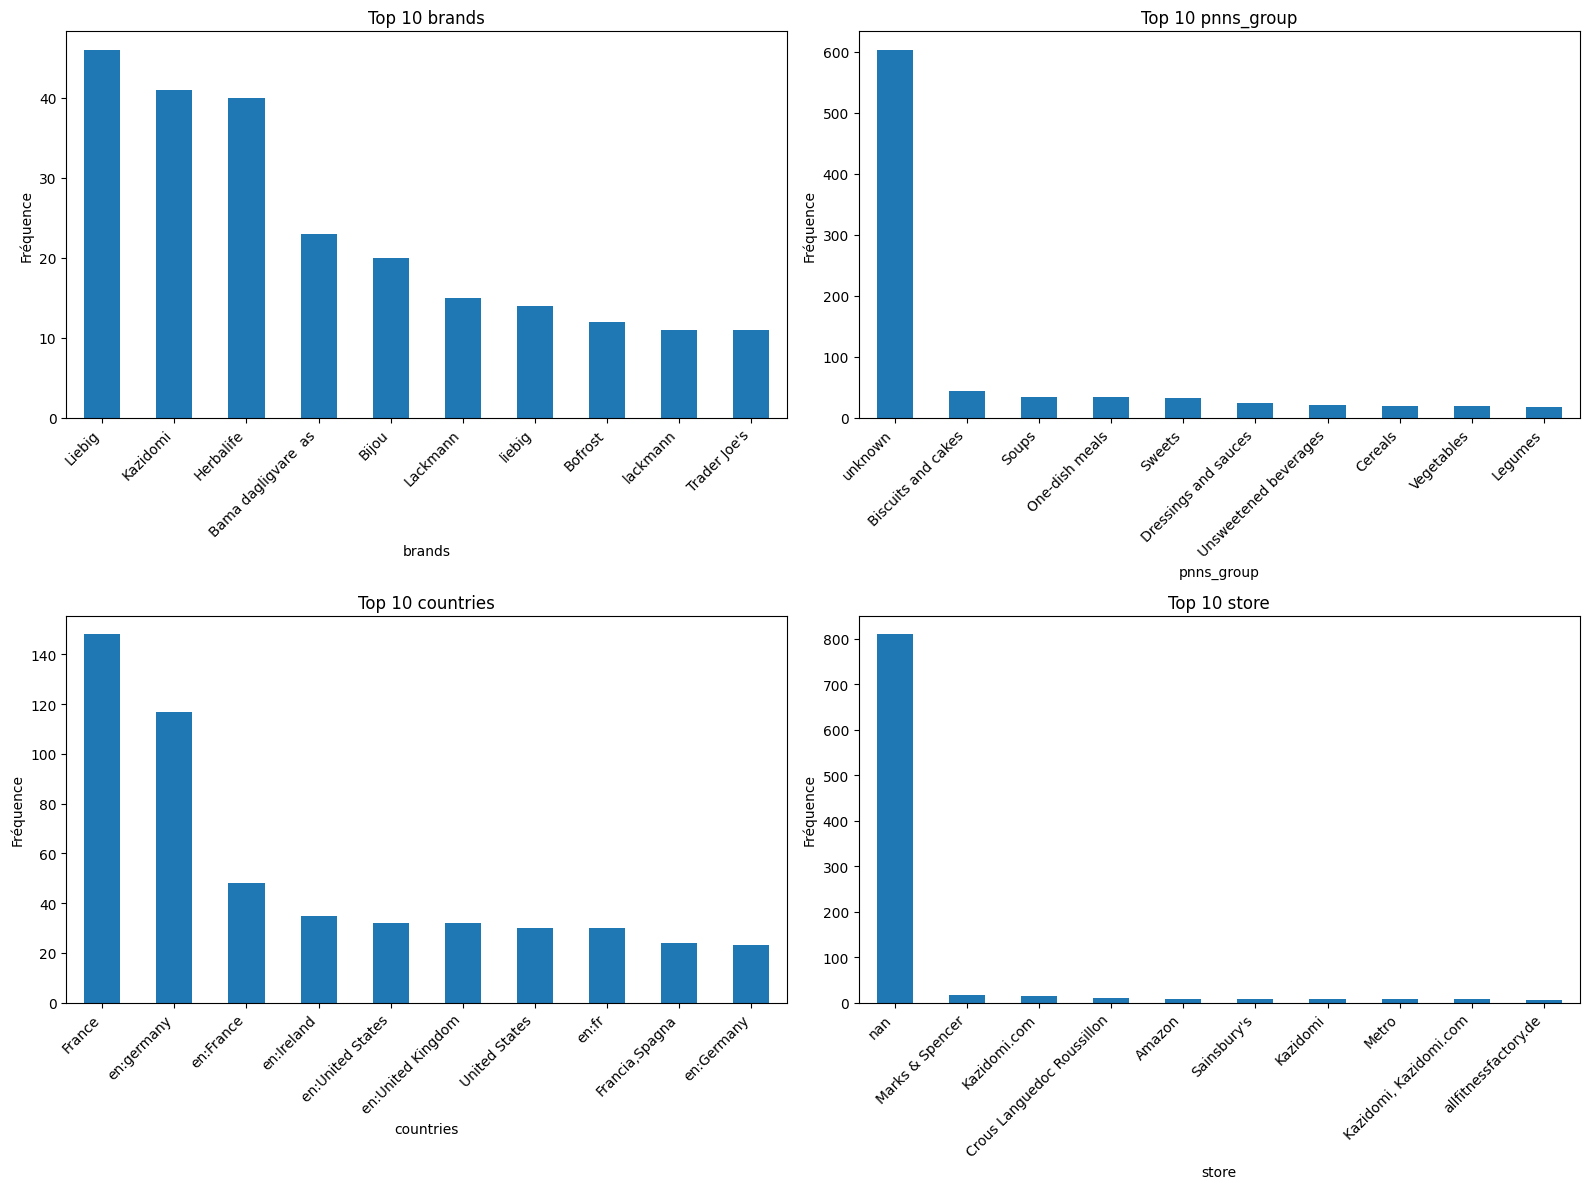

In [ ]:
# Diagrammes à barres pour les caractéristiques catégorielles (top 10 catégories)
categorical_cols = ['brands', 'pnns_group', 'countries', 'store']
plt.figure(figsize=(16, 12))
for i, col in enumerate(categorical_cols):
    if col in df.columns:
        plt.subplot(2, 2, i + 1)
        df[col].value_counts(dropna=False).nlargest(10).plot(kind='bar')
        plt.title(f'Top 10 {col}')  # 'Top 10' can be kept as is, or translated to '10 premiers/premières'
        plt.xlabel(col)
        plt.ylabel('Fréquence')
        plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Résumé :
1. Questions & Réponses
Aucune question n'a été posée dans la tâche d'analyse de données fournie.

2. Principales Conclusions de l'Analyse des Données
Données Manquantes : Plusieurs colonnes, notamment store, allergens, labels, categories, et deux colonnes sans nom, présentent un nombre important de valeurs manquantes (plus de 50%). La colonne countries a 2 valeurs manquantes. Cela suggère la nécessité d'une imputation ou d'une suppression des lignes/colonnes avec des données manquantes excessives avant de poursuivre l'analyse.
Cardinalité Élevée : Des colonnes telles que brands et product_name présentent une cardinalité élevée, ce qui signifie un grand nombre de valeurs uniques, ce qui pourrait avoir un impact sur certaines techniques de modélisation.
Distribution du Code : La colonne code a une large gamme de valeurs, avec une moyenne d'environ 190 millions et un maximum dépassant 1,2 milliard, une distribution asymétrique (moyenne > médiane).
Analyse des Quantités : La colonne quantity a nécessité un traitement pour extraire la valeur numérique et l'unité. La quantité numérique extraite a une moyenne qui peut être informative sur les tailles typiques des produits.
Dominance du Groupe PNNS : La catégorie "unknown" est prévalente dans la colonne pnns_group, indiquant des classifications de groupes de produits incomplètes ou manquantes.
Code Moyen par Catégorie : L'analyse du code moyen pour chaque catégorie unique dans diverses colonnes a révélé des relations potentielles entre les codes de produits et les caractéristiques catégorielles, certaines catégories ayant des codes moyens nettement plus élevés que d'autres.
3. Perspectives ou Prochaines Étapes
Nettoyage des Données : Donner la priorité au traitement des valeurs manquantes. Envisager des techniques d'imputation ou la suppression des lignes/colonnes avec un pourcentage élevé de données manquantes. Décider s'il faut supprimer ou catégoriser les lignes avec des valeurs "unknown" (inconnues).
Ingénierie des Caractéristiques : Explorer l'ingénierie des caractéristiques, par exemple, en créant de nouvelles caractéristiques à partir de quantity (par exemple, des plages de quantités, une unité de mesure), categories, et d'autres colonnes catégorielles. Examiner les informations potentielles issues de la relation entre code et les différentes catégories.


## Résumé :

### Principales Conclusions de l'Analyse des Données

*   **Données Manquantes :** Plusieurs colonnes, notamment `store`, `allergens`, `labels`, `categories`, et deux colonnes sans nom, présentent un nombre important de valeurs manquantes (plus de 50%). La colonne `countries` a 2 valeurs manquantes. Cela suggère la nécessité d'une imputation ou d'une suppression des lignes/colonnes avec des données manquantes excessives avant de poursuivre l'analyse.
*   **Cardinalité Élevée :** Des colonnes telles que `brands` et `product_name` présentent une cardinalité élevée, ce qui signifie un grand nombre de valeurs uniques, ce qui pourrait avoir un impact sur certaines techniques de modélisation.
*   **Analyse des Quantités :**  The `quantity` column required processing to extract the numerical value and unit. The extracted numerical quantity has a mean that may be informative about the typical product sizes.
*   **Dominance du Groupe PNNS :** La catégorie "unknown" est prévalente dans la colonne `pnns_group`, indiquant des classifications de groupes de produits incomplètes ou manquantes.


### Nettoyage des Données

Donner la priorité au traitement des valeurs manquantes. Envisager des techniques d'imputation ou la suppression des lignes/colonnes avec un pourcentage élevé de données manquantes. Décider s'il faut supprimer ou catégoriser les lignes avec des valeurs "unknown" (inconnues).


### **Approches possibles en Machine Learning**
1. **Prédiction de la catégorie de produit**  
   - **Objectif** : Entraîner un modèle pour prédire la catégorie d’un produit en fonction d’attributs tels que la marque, les labels et les allergènes.  
   - **Techniques ML** : Classification (**Régression Logistique, Arbre de Décision, Random Forest, ou Naïve Bayes**).

2. **Prédiction de la disponibilité par pays**  
   - **Objectif** : Prédire dans quel pays un produit pourrait être disponible en fonction de ses attributs.  
   - **Techniques ML** : Classification multi-étiquettes (**Arbres de Décision, SVM, Réseaux de Neurones**).

3. **Regroupement de produits (Apprentissage non supervisé)**  
   - **Objectif** : Regrouper des produits similaires en fonction de leurs attributs (**marques, catégories, labels**).  
   - **Techniques ML** : **K-Means, Clustering Hiérarchique**.

4. **Système de recommandation pour les magasins**  
   - **Objectif** : Suggérer de nouveaux produits aux magasins en fonction de leur inventaire existant.  
   - **Techniques ML** : **Filtrage Collaboratif (Factorisation de Matrice, KNN basé sur la similarité)**.

### **Étapes de Prétraitement**
Avant d'appliquer le machine learning, nous devons :
- **Convertir les variables catégorielles en format numérique** (One-Hot Encoding, Label Encoding).
- **Gérer les valeurs manquantes**.
- **Normaliser ou standardiser les données** si nécessaire.
- **Diviser les données en ensembles d’entraînement et de test**.